In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential




from tensorflow.keras.layers import LSTM, Dense

%matplotlib inline



In [14]:
am  = pd.read_csv(r"D:\ayyan_11\CODE\ARIMA\shkpur\SHEKHPURA.csv" , usecols = ['Date' , 'Value'])



In [15]:
# am = am['Date','Value']

In [16]:
am.head()

,Date,Value
0,01-01-1981,47.46
1,01-02-1981,10.55
2,01-03-1981,5.27
3,01-04-1981,5.27
4,01-05-1981,31.64


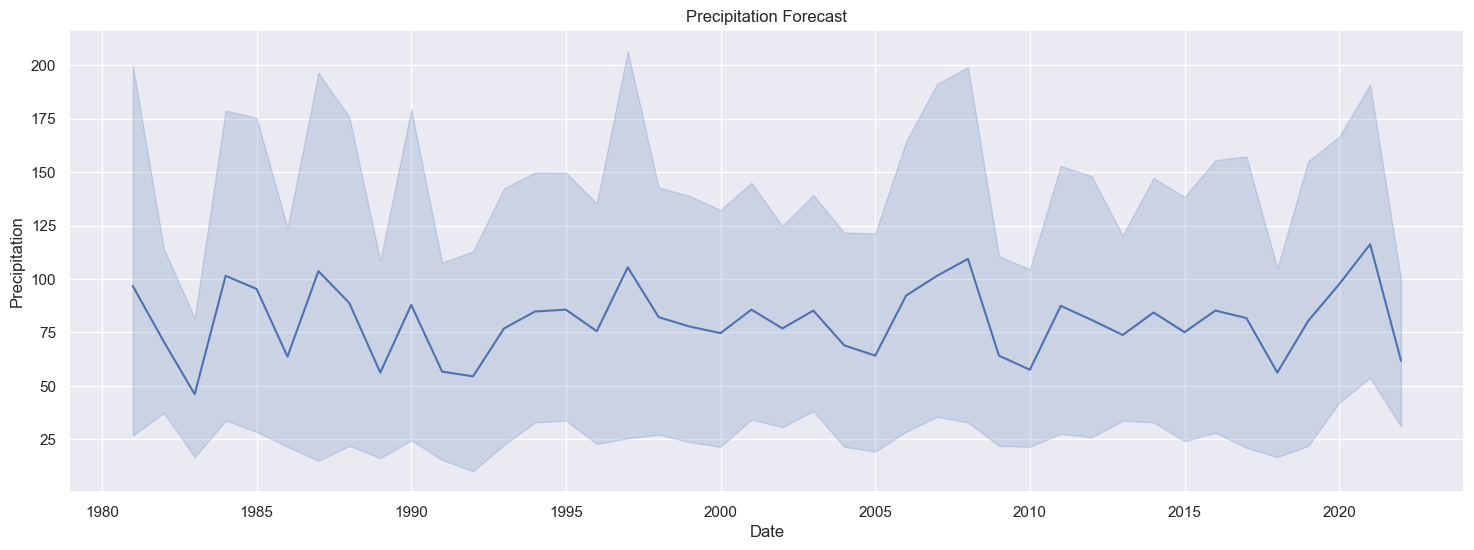

In [187]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Value', data=df)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Forecast')
plt.show()

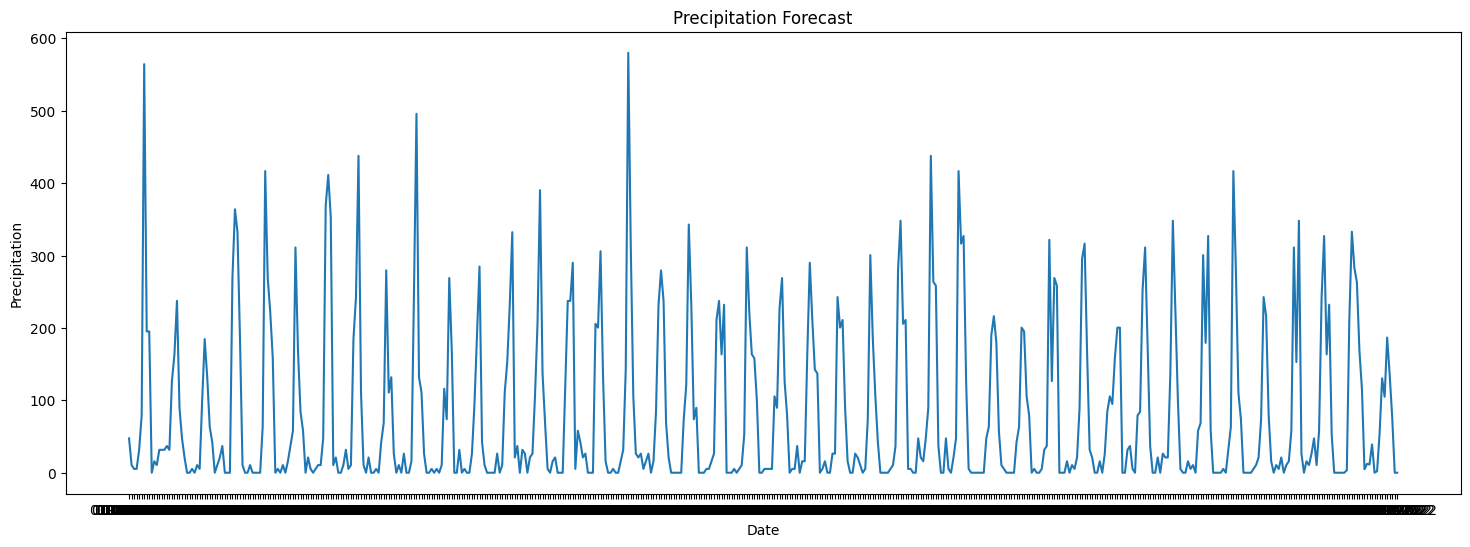

In [17]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Value', data=am)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Forecast')
plt.show()

In [18]:
am


,Date,Value
0,01-01-1981,47.46
1,01-02-1981,10.55
2,01-03-1981,5.27
3,01-04-1981,5.27
4,01-05-1981,31.64
...,...,...
500,01-09-2022,135.29
501,01-10-2022,76.72
502,01-11-2022,0.00
503,01-12-2022,0.03


In [19]:
# am.drop(am.head(840).index, inplace=True)


In [20]:
am

,Date,Value
0,01-01-1981,47.46
1,01-02-1981,10.55
2,01-03-1981,5.27
3,01-04-1981,5.27
4,01-05-1981,31.64
...,...,...
500,01-09-2022,135.29
501,01-10-2022,76.72
502,01-11-2022,0.00
503,01-12-2022,0.03


In [24]:
df = pd.read_csv(r"D:\ayyan_11\CODE\ARIMA\shkpur\SHEKHPURA.csv" , usecols = ['Date' , 'Value'])

# [852 rows x 2 columns]


In [33]:
df

,Date,Value
0,01-01-1981,47.46
1,01-02-1981,10.55
2,01-03-1981,5.27
3,01-04-1981,5.27
4,01-05-1981,31.64
...,...,...
499,01-08-2022,186.68
500,01-09-2022,135.29
501,01-10-2022,76.72
502,01-11-2022,0.00


In [36]:
df.sample(5)

,Date,Value
86,01-03-1988,31.64
179,01-12-1995,42.19
92,01-09-1988,110.74
233,01-06-2000,210.94
280,01-05-2004,26.37


In [34]:
df.head(13)

,Date,Value
0,01-01-1981,47.46
1,01-02-1981,10.55
2,01-03-1981,5.27
3,01-04-1981,5.27
4,01-05-1981,31.64
5,01-06-1981,79.10
6,01-07-1981,564.26
7,01-08-1981,195.12
8,01-09-1981,195.12
9,01-10-1981,0.00


In [28]:
df.drop(df.tail(1).index, inplace=True)

In [31]:
df.tail(14)

,Date,Value
490,01-11-2021,4.76
491,01-12-2021,12.28
492,01-01-2022,11.29
493,01-02-2022,39.00
494,01-03-2022,0.08
495,01-04-2022,2.06
496,01-05-2022,54.43
497,01-06-2022,130.49
498,01-07-2022,104.92
499,01-08-2022,186.68


In [32]:
train_dates=pd.to_datetime(df['Date'])

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [191]:
am['Date'] = pd.to_datetime(am['Date'])


In [38]:
# Convert the 'DateColumn' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Change the day to 1 for all dates
# df['Date'] = df['Date'].apply(lambda dt: dt.replace(day=1))

In [40]:
df = df[['Date', 'Value']]

print(df)

          Date   Value
0   1981-01-01   47.46
1   1981-01-01   10.55
2   1981-01-01    5.27
3   1981-01-01    5.27
4   1981-01-01   31.64
..         ...     ...
499 2022-01-01  186.68
500 2022-01-01  135.29
501 2022-01-01   76.72
502 2022-01-01    0.00
503 2022-01-01    0.03

[504 rows x 2 columns]


In [41]:
df

,Date,Value
0,1981-01-01,47.46
1,1981-01-01,10.55
2,1981-01-01,5.27
3,1981-01-01,5.27
4,1981-01-01,31.64
...,...,...
499,2022-01-01,186.68
500,2022-01-01,135.29
501,2022-01-01,76.72
502,2022-01-01,0.00


In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

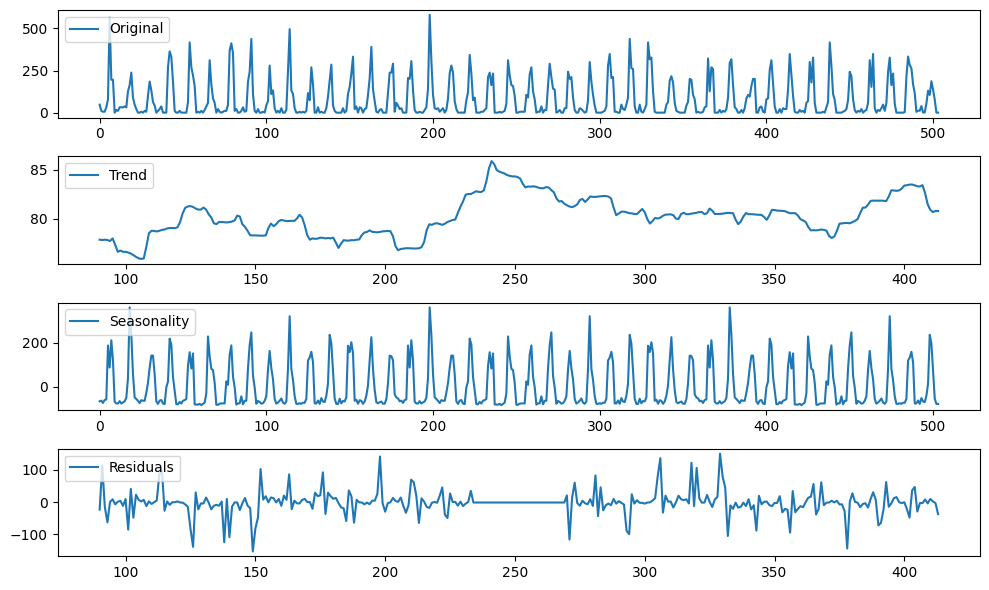

In [45]:

# Perform seasonal decomposition
result = seasonal_decompose(df['Value'], model='additive', period=180)

# Plot the components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
504  ,360 ,720

In [46]:
df

,Date,Value
0,1981-01-01,47.46
1,1981-01-01,10.55
2,1981-01-01,5.27
3,1981-01-01,5.27
4,1981-01-01,31.64
...,...,...
499,2022-01-01,186.68
500,2022-01-01,135.29
501,2022-01-01,76.72
502,2022-01-01,0.00


In [47]:
cols=list(df)[1:2]
print(cols)

['Value']


<Axes: >

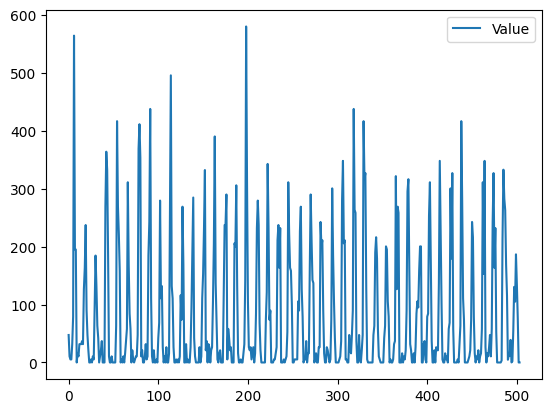

In [48]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [49]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [119]:
df.head(6)

,Date,Value
0,1981-01-01,47.46
1,1981-01-01,10.55
2,1981-01-01,5.27
3,1981-01-01,5.27
4,1981-01-01,31.64
5,1981-01-01,79.10


#trainX for storing training data 
#trainY for storing target values(rainfall)

In [120]:
160/12

13.333333333333334

In [129]:

trainX=[]
trainY=[]

n_past=70       # 100 last month learned
n_fut=100       


#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)



In [130]:
print('trainX shape == {}'.format(trainX.shape))#Knowing the shape
#(364,20,4) means there are 364windows(groups) of 20*4


print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

trainX shape == (335, 70, 1)
trainY shape == (335, 1)


In [131]:
573+80+200
# trainY = trainY.reshape(-1, 1)



853

In [132]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.1))

model.add(Dense(trainY.shape[1]))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


optimizer  = Adam( )  # Adjust the learning rate  , learning_rate=0.001 ,clipvalue=1.0
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 70, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 70, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 70, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 70, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
from tensorflow.keras.optimizers import RMSprop


In [134]:
from tensorflow.keras.optimizers import Adam


In [135]:
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import HeNormal




In [136]:
history=model.fit(trainX,trainY,epochs=15,batch_size=4,validation_split=0.2,verbose=1)

Epoch 1/15


67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.8432 - val_loss: 0.9889
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.9641 - val_loss: 0.9742
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.8251 - val_loss: 0.7118
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.9193 - val_loss: 0.5944
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.5874 - val_loss: 0.6557
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.7483 - val_loss: 0.4246
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.4570 - val_loss: 0.4121
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4084 - val_loss: 0.3422
Epoch 9/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4091 - val_loss: 0.3631
Epoch 10/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3336 - val_loss: 0.3631
Epoch 11/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4282 - val_loss: 0.3140
Epoch 12/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3766 - val_l

In [137]:
# # Access accuracy values
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# # Print the last accuracy value (after the final epoch)
# print(f"Training accuracy: {train_acc[-1]:.4f}")
# print(f"Validation accuracy: {val_acc[-1]:.4f}")

In [138]:
predictions=model.predict(trainX)



11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step


## Performance of model

In [139]:
from math import sqrt

In [157]:
# Access the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate RMSE
train_rmse = sqrt(train_loss[-1])
val_rmse = sqrt(val_loss[-1])

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")


Training RMSE: 0.5309
Validation RMSE: 0.6679


Validation RMSE: 0.6297

 is it good for lstm rainfall prediction

Copilot
Sent by Copilot:
An RMSE value of 0.6297 for rainfall prediction using an LSTM model is quite promising! However, whether it’s considered “good” depends on the specific context and requirements of your application:

Relative Scale:
Consider the scale of your rainfall data. If the rainfall measurements are in millimeters (mm), an RMSE of 0.6297 mm indicates relatively accurate predictions.
Compare it to the range of actual rainfall values. If the range is small (e.g., 0 to 10 mm), this RMSE is excellent. If the range is larger (e.g., 0 to 1000 mm), it’s still quite good.
Baseline Comparison:
Compare your LSTM model’s RMSE to a baseline:
Baseline: For example, using the mean or median of historical rainfall as predictions.
If your model’s RMSE is significantly lower than the baseline, that’s a positive sign.
Domain-Specific Considerations:
In some applications (e.g., flood prediction), even small errors can have significant consequences. In such cases, strive for lower RMSE.
For other applications (e.g., agricultural planning), a slightly higher RMSE might still be acceptable.
Further Investigation:
Look at other evaluation metrics (e.g., MAE, R²) and consider the overall performance of your model.
Check if the LSTM captures temporal patterns effectively (e.g., seasonal variations, long-term dependencies).
Remember that context matters, and there’s no universal threshold for “good” RMSE. If your model meets your specific needs and performs well in practical scenarios, it’s a success!

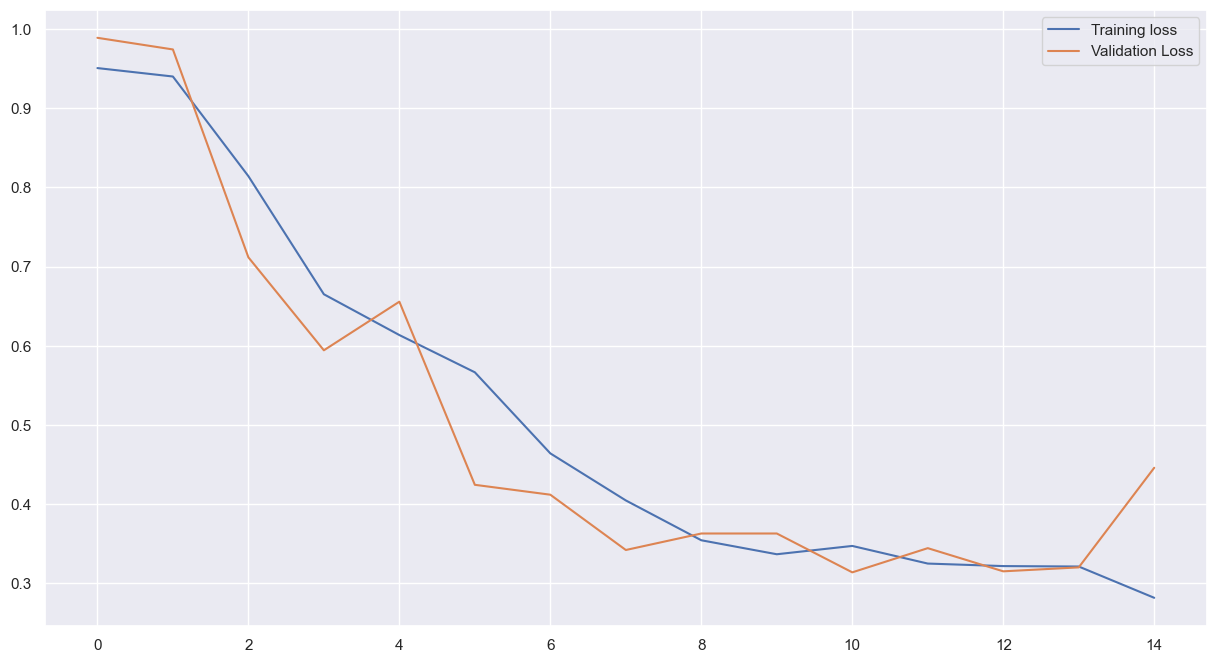

In [158]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')

plt.legend()

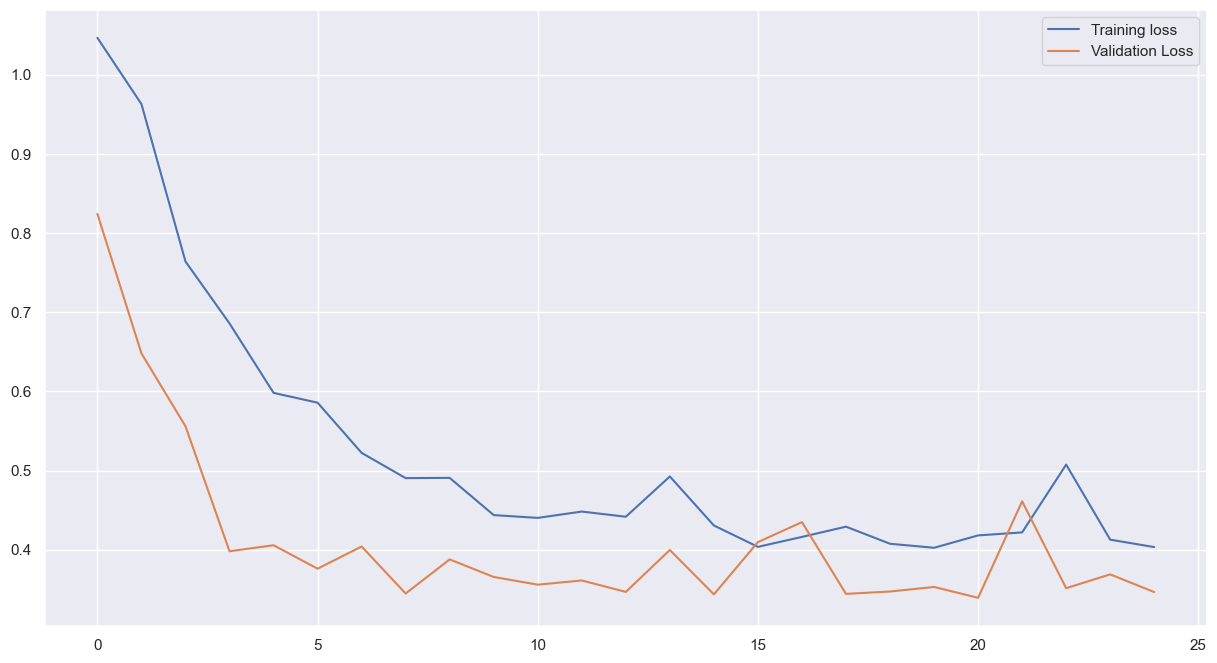

In [159]:
# plt.plot(history.history['accuracy'],label='accuracy')
# plt.plot(history.history['val_accuracy'],label='val_accuracy')
# plt.legend()

In [160]:
df.min()

Date     1981-01-01 00:00:00
Value                    0.0
dtype: object

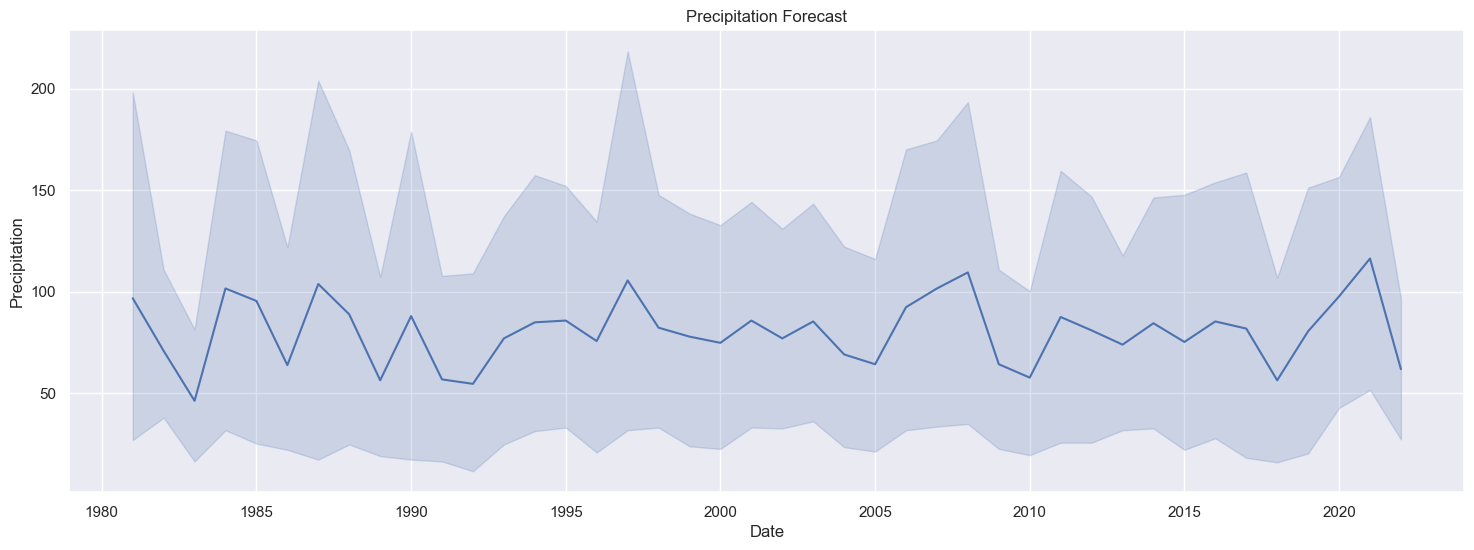

In [180]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Value', data=df)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Forecast')
plt.show()

In [161]:
df

,Date,Value
0,1981-01-01,47.46
1,1981-01-01,10.55
2,1981-01-01,5.27
3,1981-01-01,5.27
4,1981-01-01,31.64
...,...,...
499,2022-01-01,186.68
500,2022-01-01,135.29
501,2022-01-01,76.72
502,2022-01-01,0.00


In [162]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [163]:
16*12

192

In [176]:


n_past = 100     #overlap months
n_days_for_prediction=192  #3.1 month

# predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='ME').tolist()


# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)



y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Value':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

# df_forecast['Precipitation'] = df_forecast['Precipitation'].shift(1)

# df_forecast[df_forecast < 0] = 0


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


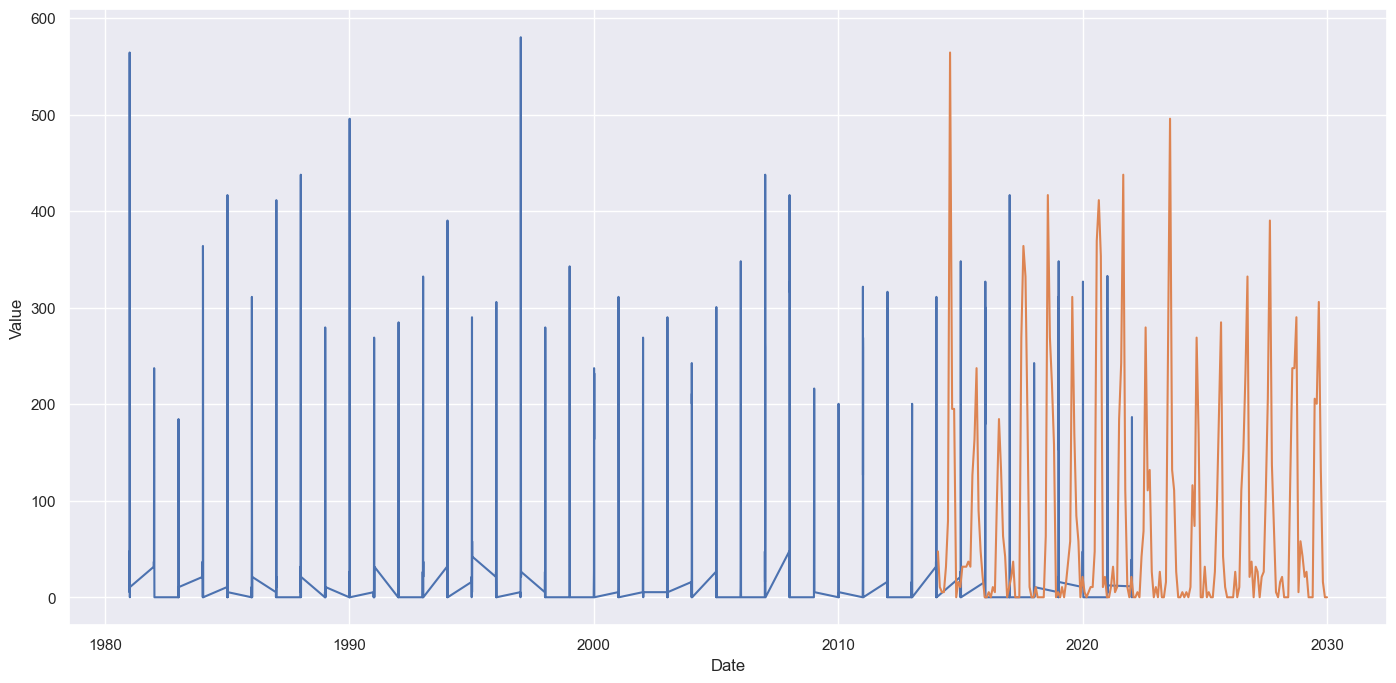

In [192]:
plt.figure(figsize=(17, 8))

# Plot the original data
sns.lineplot(x='Date', y='Value', data=am)

# Plot the forecast data

df_forecast['Value'] = df['Value'].clip(lower=0)

sns.lineplot(x='Date', y='Value', data=df_forecast)

# Show the plot
plt.show()

In [166]:
# import plotly.express as px

# # Slice the future_df to only include forecasted values
# forecast_df = future_df[future_df['forecast'].notna()]

# # Create a Plotly figure
# fig = px.line(forecast_df, x=forecast_df.index, y='forecast', title='Future Forecast')
# fig.update_traces(line=dict(color='orange'))
# fig.show()

In [167]:
# predict_period_dates

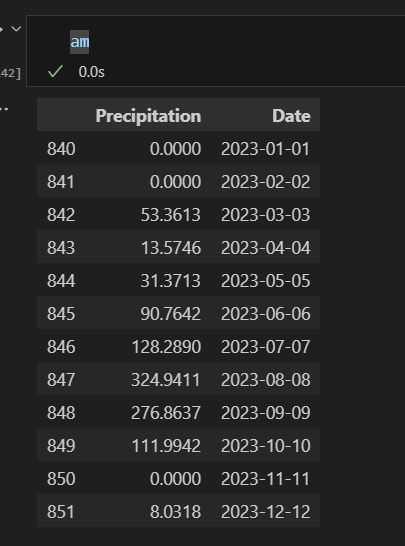

In [168]:
df_forecast.head(12)

,Date,Value
0,2022-01-31,47.46
1,2022-02-28,10.55
2,2022-03-31,5.27
3,2022-04-30,5.27
4,2022-05-31,31.64
5,2022-06-30,79.10
6,2022-07-31,564.26
7,2022-08-31,195.12
8,2022-09-30,195.12
9,2022-10-31,0.00


In [169]:
# pred = model.predict(trainX)

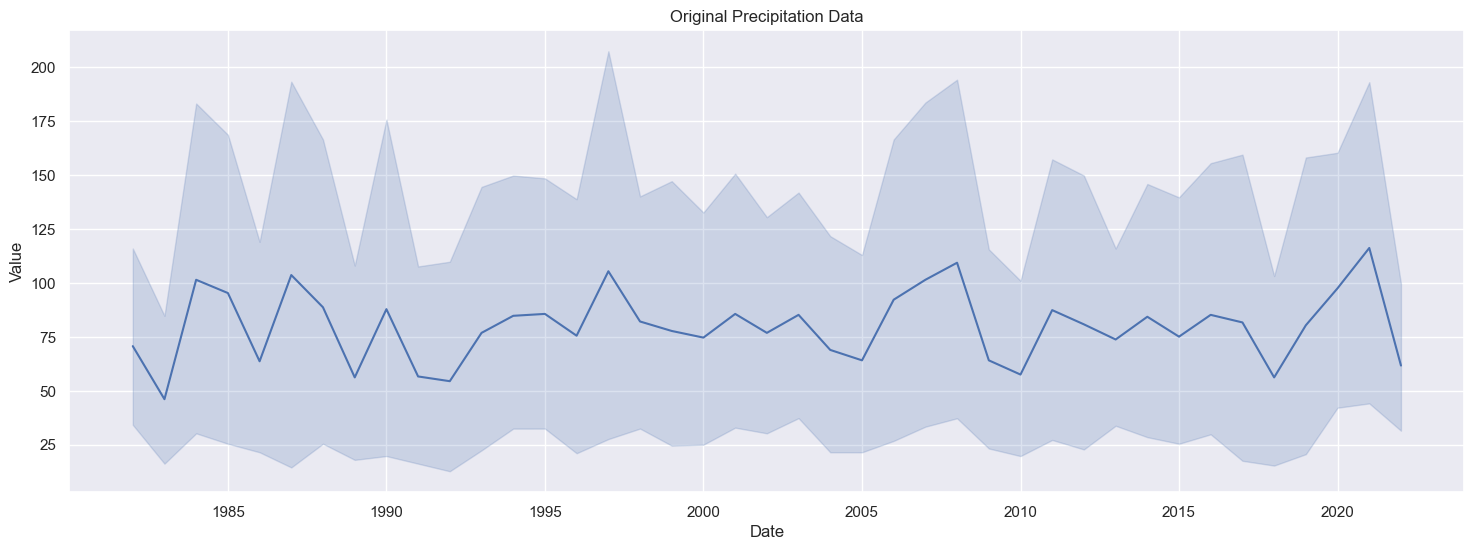

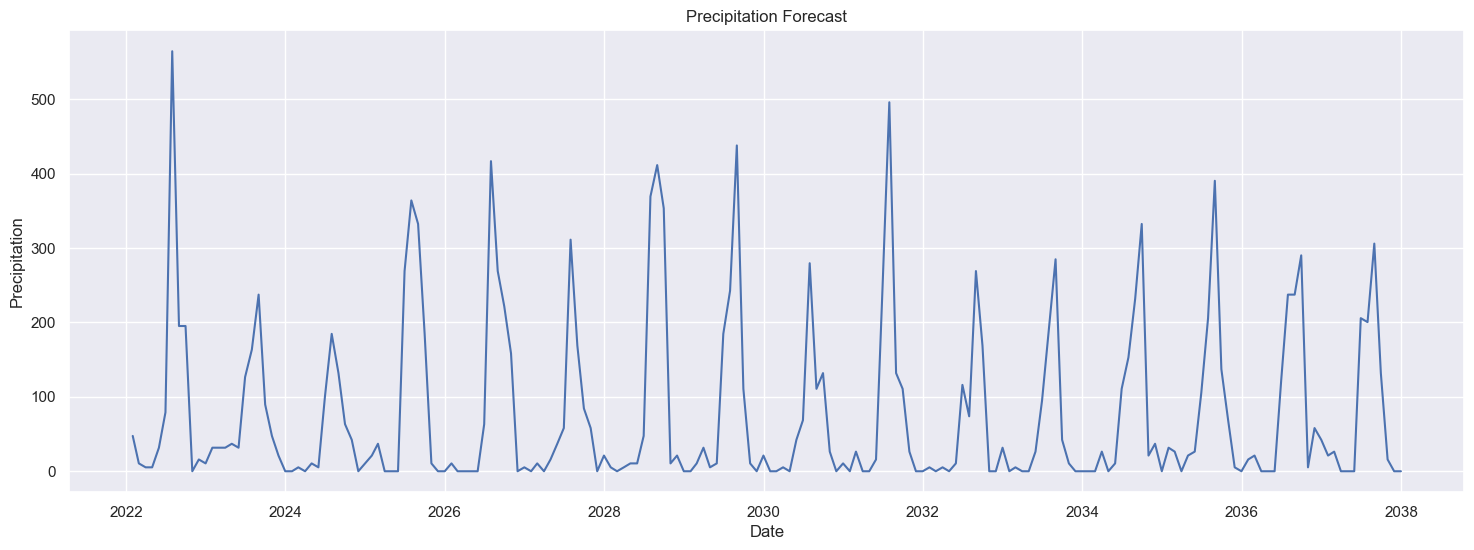

In [170]:
import seaborn as sns

original = df[['Date', 'Value']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '1982-1-1']

sns.set(rc = {'figure.figsize':(15,8)})
# sns.lineplot(original['Date'], original['Precipitation'])
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Value', data=original)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Precipitation Data')
plt.show()


# Precipitation

# sns.lineplot(df_forecast['Date'], df_forecast['Precipitation'])

plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Value', data=df_forecast)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Forecast')
plt.show()

shkpura 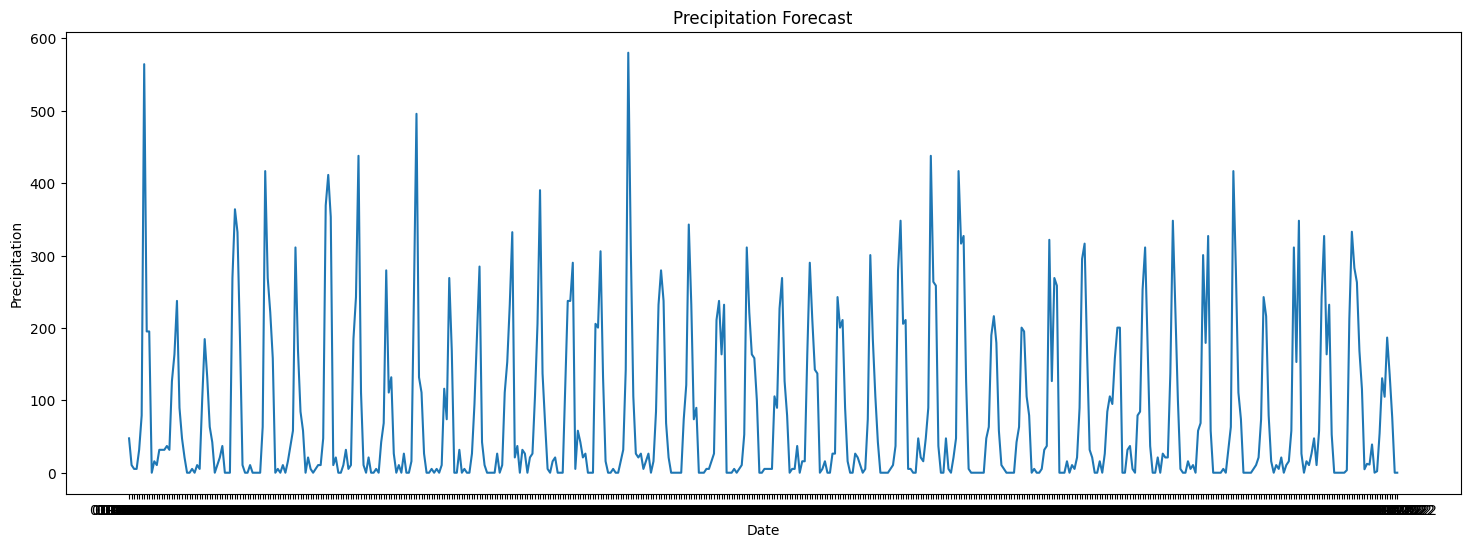

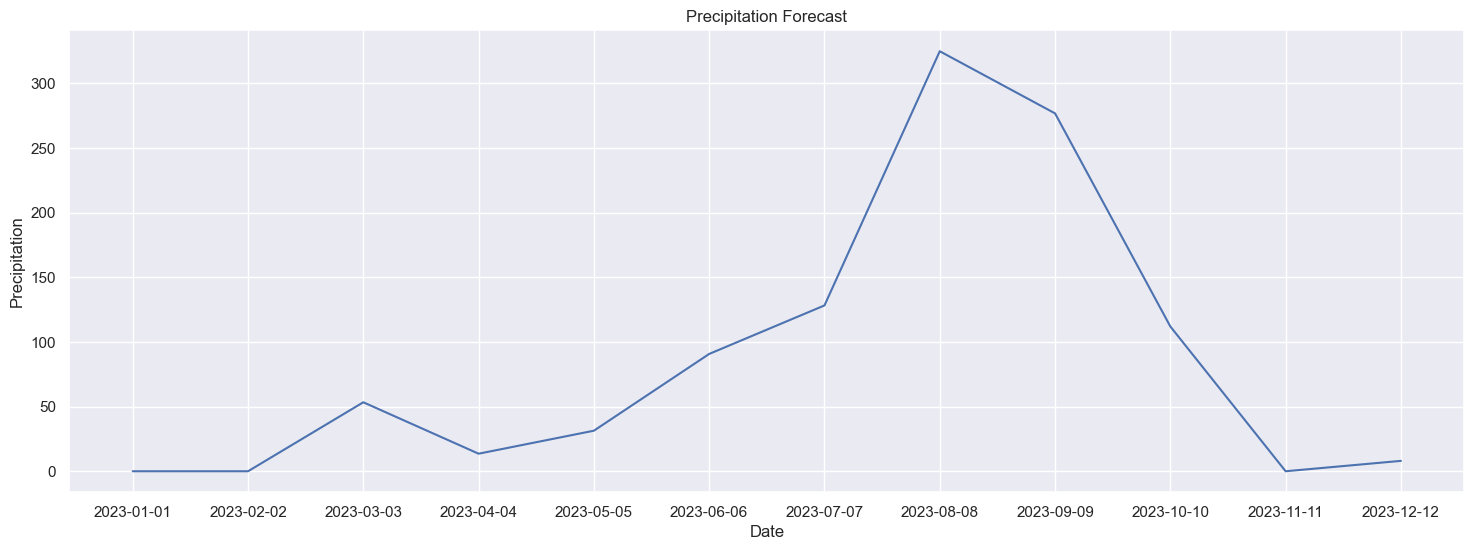

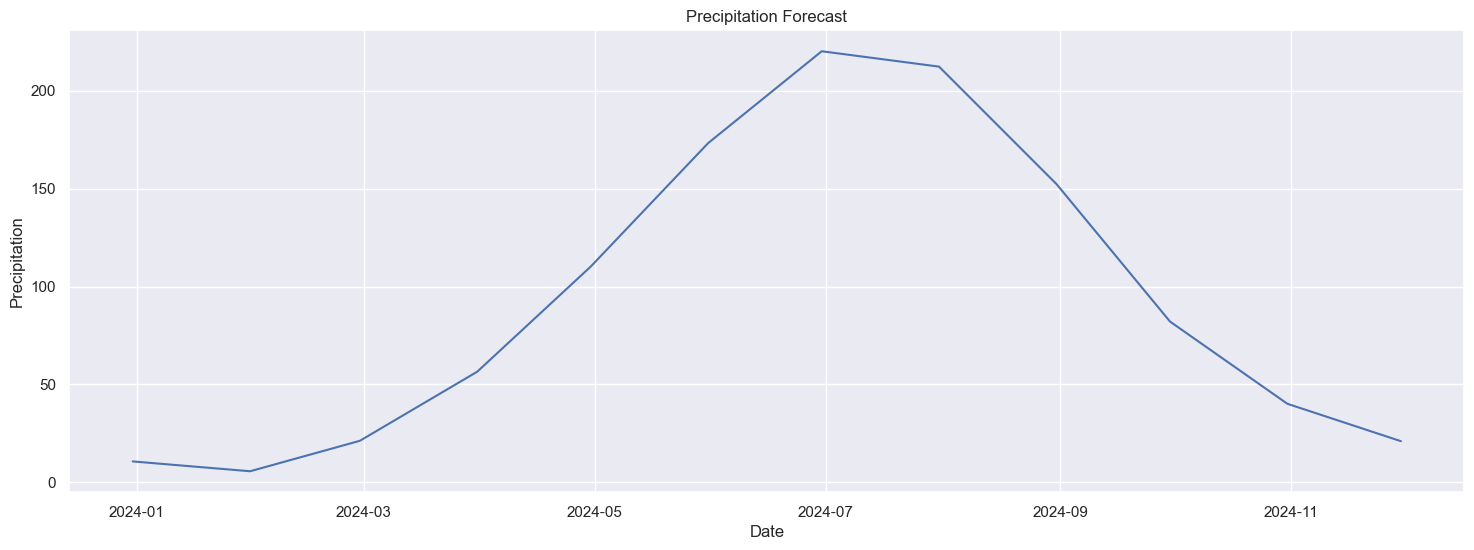

https://www.overleaf.com/project/6695de722896239a59463d64

In [86]:
# plt.figure(figsize=(15, 8))

# # Plot the original data
# sns.lineplot(x='Date', y='Precipitation', data=original)

# # Plot the forecast data
# sns.lineplot(x='Date', y='Precipitation', data=df_forecast)

# # Show the plot
# plt.show()

In [87]:
# from keras.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error



In [88]:
# mse_loss = mean_squared_error( trainY, prediction)


# During each epoch, the model computes predictions for the training data (trainX) and compares them to the actual target values (trainY).